In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV, SelectFromModel
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utility import fill_missing_values_using_oknn

from src.data_processing import data_processed


# 导入TrainDataset2024
def load_data(path):
    data = pd.read_excel(path)
    return data

file_path = 'data/raw/TrainDataset2024.xls'
data = load_data(file_path).drop(columns=['ID'])

In [3]:
data.head()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,144.0,41.0,0,0,0,1,3,3,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,142.0,39.0,1,1,0,0,3,3,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,135.0,31.0,0,0,0,1,2,1,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,12.0,35.0,0,0,0,1,3,3,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,109.0,61.0,1,0,0,0,2,1,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [4]:

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:

# 显示数据的基本信息
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 120 entries, pCR (outcome) to original_ngtdm_Strength
dtypes: float64(108), int64(12)
memory usage: 375.1 KB
None


In [6]:

# 显示数据的描述性统计信息
print(data.describe())

       pCR (outcome)  RelapseFreeSurvival (outcome)         Age          ER  \
count     400.000000                     400.000000  400.000000  400.000000   
mean       12.697500                      56.000208   51.804674    0.547500   
std       111.107417                      27.137584   10.948522    0.498362   
min         0.000000                       0.000000   23.000000    0.000000   
25%         0.000000                      38.000000   44.516769    0.000000   
50%         0.000000                      55.000000   51.019507    1.000000   
75%         0.000000                      73.000000   60.000000    1.000000   
max       999.000000                     144.000000   79.603012    1.000000   

              PgR        HER2  TrippleNegative  ChemoGrade  Proliferation  \
count  400.000000  400.000000       400.000000  400.000000     400.000000   
mean     2.902500    2.797500         2.830000    9.875000       6.562500   
std     49.932114   49.937068        49.935558   86.09291

In [7]:

# 检查缺失值
import pandas as pd
import numpy as np

# 检查缺失值
data = np.where(data == 999, np.nan, data)
data = pd.DataFrame(data)
missing_values = data.isnull().sum()
print(missing_values)

0      5
1      0
2      0
3      0
4      1
      ..
115    0
116    0
117    0
118    0
119    0
Length: 120, dtype: int64


In [8]:
#丢弃pcr列中含有缺失值的行
data = data.dropna(subset=[0])
#输出有大于等于3个缺失值的行的数量
print(data.isnull().sum(axis=1))
print(data[data.isnull().sum(axis=1) >= 3])
#丢弃有大于等于3个缺失值的行
data = data.dropna(thresh=data.shape[1]-3)
print(data.isnull().sum(axis=1))



0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Length: 395, dtype: int64
     0     1          2    3    4    5    6    7    8    9    ...       110  \
225  1.0  50.0  47.255305  1.0  1.0  0.0  0.0  NaN  NaN  NaN  ...  0.555687   
261  0.0  45.0  46.639288  1.0  1.0  0.0  0.0  NaN  NaN  NaN  ...  0.318539   
267  0.0  42.0  56.919918  0.0  0.0  0.0  1.0  NaN  3.0  NaN  ...  0.346553   
294  1.0  38.0  66.800000  1.0  NaN  NaN  NaN  3.0  3.0  1.0  ...  0.627560   

          111       112       113           114         115       116  \
225  0.555687  2.209691  0.000821  2.507519e+07    8.909011  0.028160   
261  0.318539  3.027169  0.004115  5.418705e+05   14.395120  0.018432   
267  0.346553  3.698274  0.004569  4.016071e+06  168.506539  0.001617   
294  0.627560  1.994841  0.001028  1.434113e+07  150.821958  0.001886   

          117       118       119  
225  0.003241  0.000008  0.025185  
261  0.040593  0.001791  0.015474  
267  

In [9]:
missing_values = data.isnull().sum()
#输出值不为0的列
missing_values = missing_values[missing_values > 0]
print(missing_values)

7      2
8      1
9      2
10     1
12    83
dtype: int64


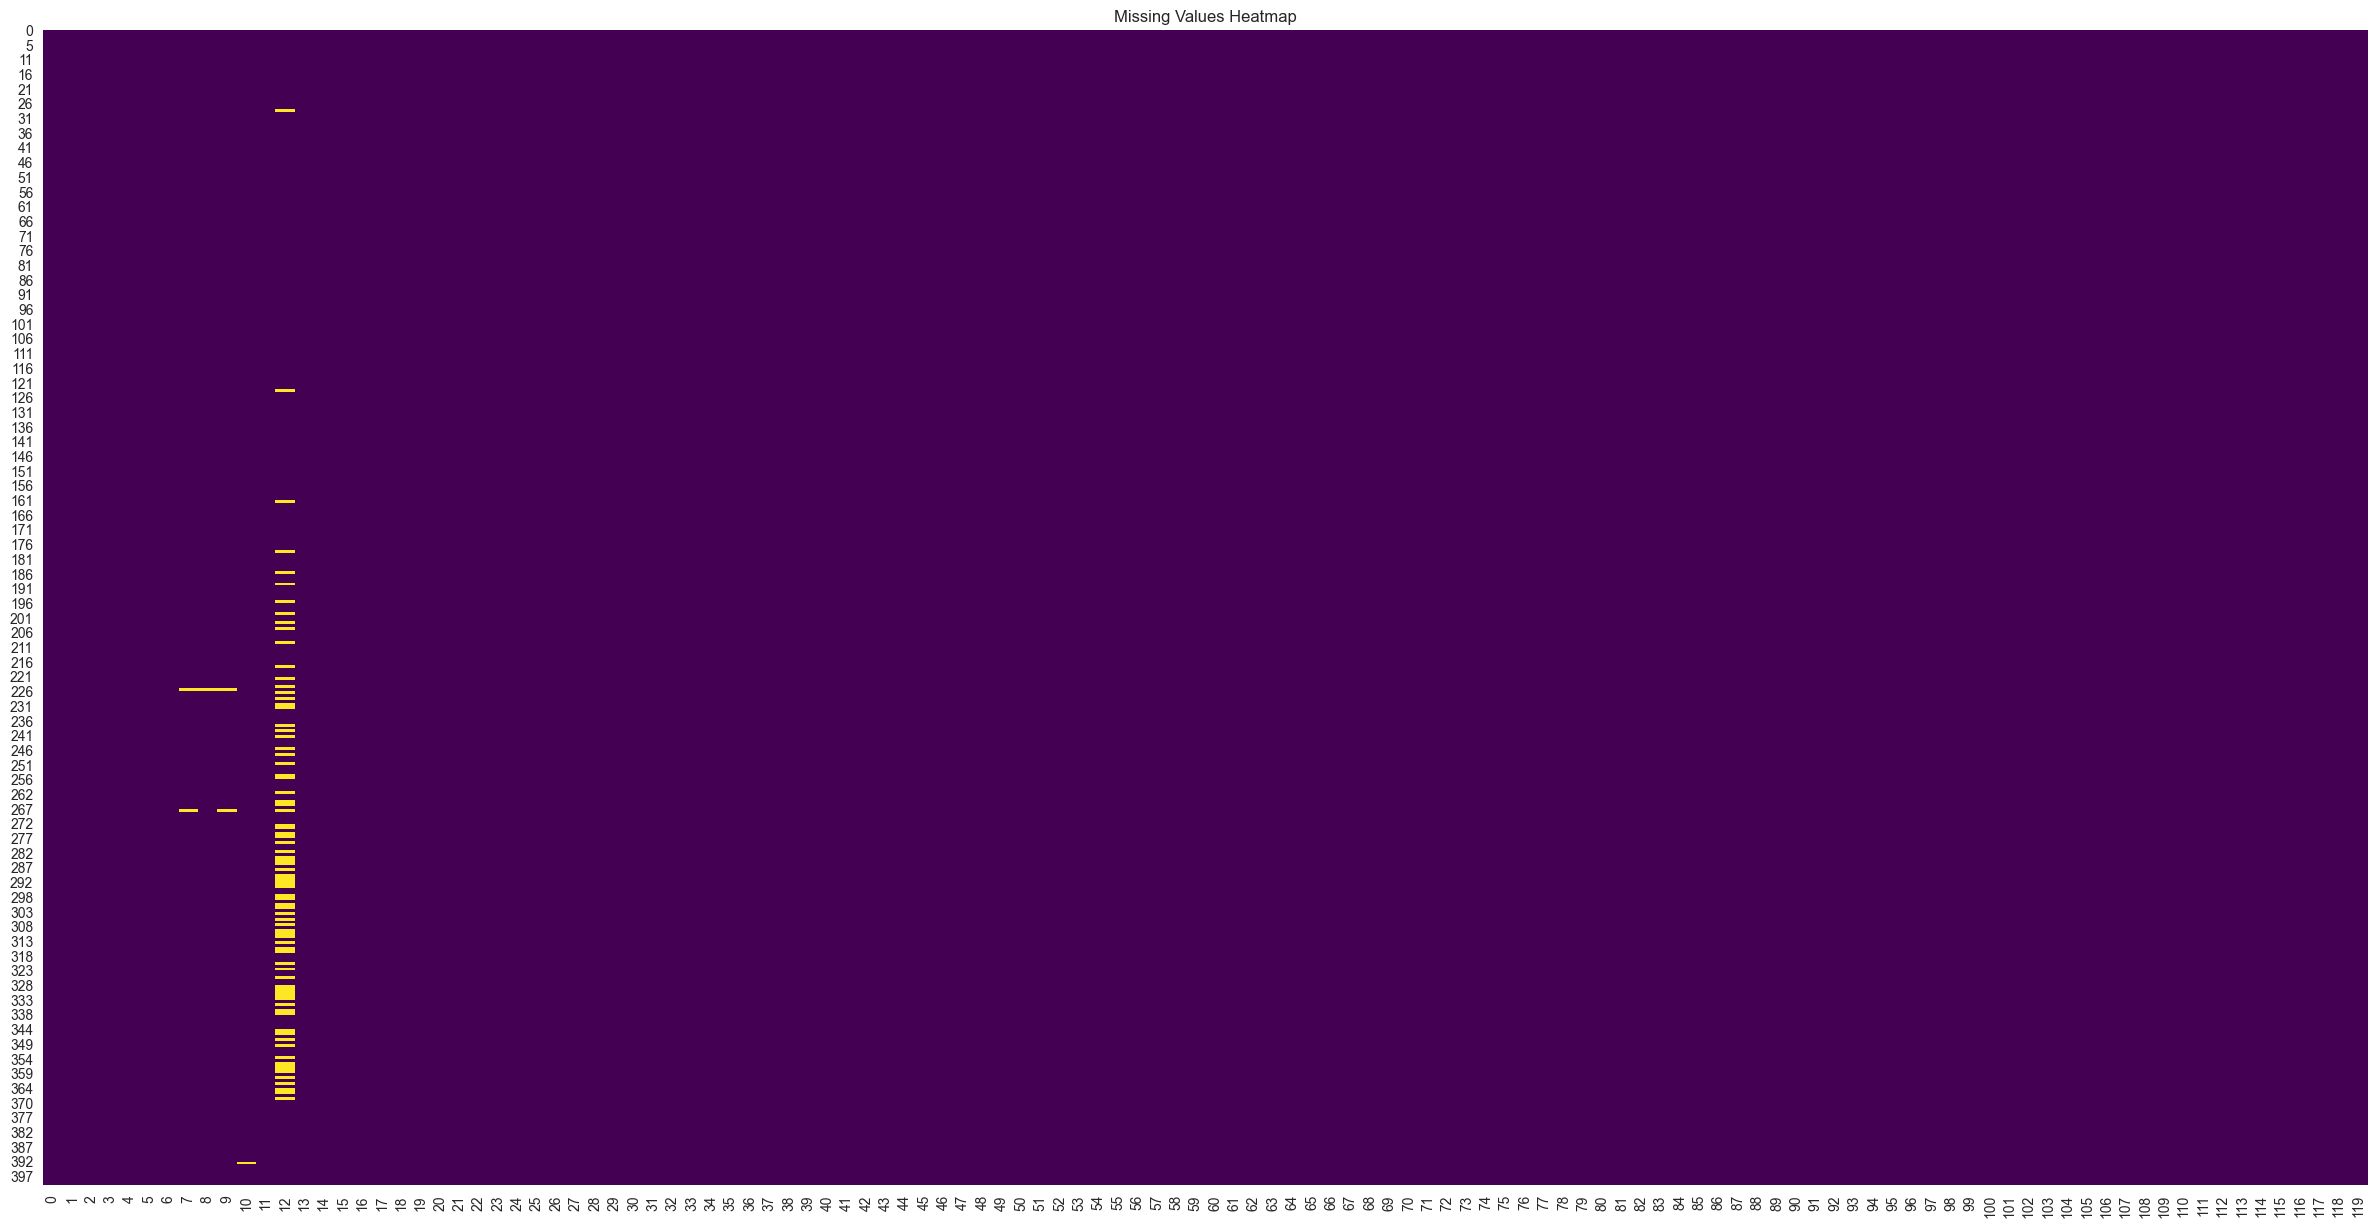

In [13]:
# 绘制缺失值热图
plt.figure(figsize=(30, 15))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
import utility as ut
data = ut.fill_missing_values_using_oknn(data, 5)

ValueError: Input X contains NaN.
KNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# 定义神经网络模型
print("Neural Network:")
class NeuralNet(nn.Module):
    def __init__(self, input_size, l2_lambda=0.0):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.l2_lambda = l2_lambda

    def forward(self, x):

        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

    def l2_regularization(self):
        l2_reg = torch.tensor(0.)
        for param in self.parameters():
            l2_reg += torch.norm(param, 2)
        return self.l2_lambda * l2_reg

# 转换为PyTorch张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# 创建数据加载器
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
Patient Graph Deep Learning to Predict Breast Cancer Molecular SubtypePatient Graph Deep Learning to Predict Breast Cancer Molecular Subtype

# 定义网格搜索参数
param_grid = {
    'l2_lambda': [0.0, 0.01, 0.1],
    'lr': [0.001, 0.01, 0.1]
}

# 交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_score = 0
best_params = {}

for l2_lambda in param_grid['l2_lambda']:
    for lr in param_grid['lr']:
        fold_scores = []
        for train_index, val_index in kf.split(X_train_tensor):
            X_fold_train, X_fold_val = X_train_tensor[train_index], X_train_tensor[val_index]
            y_fold_train, y_fold_val = y_train_tensor[train_index], y_train_tensor[val_index]

            model = NeuralNet(input_size=X_train.shape[1], l2_lambda=l2_lambda)
            criterion = nn.BCELoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            # 训练模型
            num_epochs = 50
            for epoch in range(num_epochs):
                for inputs, labels in DataLoader(TensorDataset(X_fold_train, y_fold_train), batch_size=10, shuffle=True):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels) + model.l2_regularization()
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            # 验证模型
            model.eval()
            with torch.no_grad():
                y_val_pred = model(X_fold_val)
                y_val_pred_class = (y_val_pred > 0.5).float()
                fold_scores.append(accuracy_score(y_fold_val, y_val_pred_class))

        avg_score = np.mean(fold_scores)
        if avg_score > best_score:
            best_score = avg_score
            best_params = {'l2_lambda': l2_lambda, 'lr': lr}

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# 使用最佳参数训练最终模型
model = NeuralNet(input_size=X_train.shape[1], l2_lambda=best_params['l2_lambda'])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=best_params['lr'])

# 训练最终模型
num_epochs = 50
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels) + model.l2_regularization()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# 评估最终模型
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred > 0.5).float()
    accuracy = accuracy_score(y_test_tensor, y_pred_class)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test_tensor, y_pred_class))

In [ ]:
def ML_process():
    # 初始化模型，添加正则化
    log_reg = LogisticRegression(max_iter=1000, penalty='l2', C=1.0)  # L2正则化
    tree_clf = DecisionTreeClassifier()
    svm_clf = SVC(probability=True)
    knn_clf = KNeighborsClassifier()
    rf_clf = RandomForestClassifier()

    # 创建投票分类器
    voting_clf = VotingClassifier(
        estimators=[('lr', log_reg), ('dt', tree_clf), ('svc', svm_clf), ('knn', knn_clf), ('rf', rf_clf)],
        voting='soft'
    )

    # 训练投票分类器
    voting_clf.fit(X_train, y_train)

    # 在验证集上评估模型
    y_val_pred = voting_clf.predict(X_val)
    print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
    print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

    # 在测试集上评估模型
    y_test_pred = voting_clf.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

print("MLprocess:")
ML_process()

In [23]:
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import src.data_processing as dp
class NeuralNet(nn.Module):
    def __init__(self, input_size, l2_lambda=0.0):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.l2_lambda = l2_lambda

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

    def l2_regularization(self):
        l2_reg = torch.tensor(0.)
        for param in self.parameters():
            l2_reg += torch.norm(param, 2)
        return self.l2_lambda * l2_reg

def fill_missing_values_with_nn(data_gene_missing, data_gene_not_missing, param_grid, num_epochs=50, n_splits=5):
    # 分离特征和目标变量
    X = data_gene_not_missing.drop(columns=[12])
    y = data_gene_not_missing[12]

    # 标准化数据
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 转换为PyTorch张量
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

    # 网格搜索和交叉验证
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    best_score = 0
    best_params = {}

    for l2_lambda in param_grid['l2_lambda']:
        for lr in param_grid['lr']:
            fold_accuracies = []
            for train_index, val_index in kf.split(X_tensor):
                X_train, X_val = X_tensor[train_index], X_tensor[val_index]
                y_train, y_val = y_tensor[train_index], y_tensor[val_index]

                # 创建数据加载器
                train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=10, shuffle=True)

                # 定义神经网络模型
                model = NeuralNet(input_size=X.shape[1], l2_lambda=l2_lambda)
                criterion = nn.BCELoss()
                optimizer = optim.Adam(model.parameters(), lr=lr)

                # 训练模型
                for epoch in range(num_epochs):
                    for inputs, labels in train_loader:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels) + model.l2_regularization()
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # 验证模型
                model.eval()
                with torch.no_grad():
                    y_val_pred = model(X_val).numpy().flatten()
                    y_val_pred = (y_val_pred > 0.5).astype(int)
                    y_val_true = y_val.numpy().flatten()
                    accuracy = accuracy_score(y_val_true, y_val_pred)
                    fold_accuracies.append(accuracy)

            avg_accuracy = np.mean(fold_accuracies)
            if avg_accuracy > best_score:
                best_score = avg_accuracy
                best_params = {'l2_lambda': l2_lambda, 'lr': lr}

    print(f"Best Parameters: {best_params}")
    print(f"Best Cross-Validation Score: {best_score:.4f}")

    # 使用最佳参数重新训练模型
    train_loader = DataLoader(TensorDataset(X_tensor, y_tensor), batch_size=10, shuffle=True)
    model = NeuralNet(input_size=X.shape[1], l2_lambda=best_params['l2_lambda'])
    optimizer = optim.Adam(model.parameters(), lr=best_params['lr'])

    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels) + model.l2_regularization()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # 对缺失数据进行填充
    model.eval()
    with torch.no_grad():
        X_missing = data_gene_missing.drop(columns=[12])
        X_missing_scaled = scaler.transform(X_missing)
        X_missing_tensor = torch.tensor(X_missing_scaled, dtype=torch.float32)
        y_missing_pred = model(X_missing_tensor)
        data_gene_missing.loc[:, 12] = y_missing_pred.numpy().flatten()

    data_filled = pd.concat([data_gene_not_missing, data_gene_missing])
    return data_filled

# 定义网格搜索参数
param_grid = {
    'l2_lambda': [0.0, 0.01, 0.1],
    'lr': [0.001, 0.01, 0.1]
}

# Load data
file_path = '../data/raw/TrainDataset2024.xls'
data_loaded = dp.load_data(file_path)

# Clean data
data_cleaned_except_gene = dp.clean_data_except_gene(data_loaded)

# Split features and target variables
X, y_classification, y_regression = dp.split_features_and_targets(data_cleaned_except_gene, 0, 1)

# Split data based on whether the gene column is missing
data_gene_missing, data_gene_not_missing = dp.split_data_by_gene(X, 12)

# Fill missing values in the gene column
data_processed = fill_missing_values_with_nn(data_gene_missing, data_gene_not_missing, param_grid)

# Add classification and regression targets back to the processed data
data_processed['classification_target'] = y_classification.values
data_processed['regression_target'] = y_regression.values

# Save the processed data to a CSV file
output_file_path = '../data/processed/ProcessedDataset2024.csv'
data_processed.to_csv(output_file_path, index=False)

Best Parameters: {'l2_lambda': 0.0, 'lr': 0.1}
Best Cross-Validation Score: 0.6172


In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# 加载数据
file_path = '../data/raw/TrainDataset2024.xls'
data = pd.read_excel(file_path).drop(columns=['ID'])

# 处理缺失值
data = data.replace(999, np.nan)
data = data.dropna()

# 分离特征和目标变量
X = data.drop(columns=['pCR (outcome)', 'RelapseFreeSurvival (outcome)'])
y_classification = data['pCR (outcome)']
y_regression = data['RelapseFreeSurvival (outcome)']

# 分割数据集
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# 逻辑回归分类
log_reg = LogisticRegression(max_iter=200000)
log_reg.fit(X_train_class, y_train_class)
y_pred_class = log_reg.predict(X_test_class)
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {classification_accuracy:.4f}")

# SVM回归
svm_reg = SVR()
svm_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = svm_reg.predict(X_test_reg)
regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Mean Squared Error: {regression_mse:.4f}")

Classification Accuracy: 0.8548
Regression Mean Squared Error: 944.7696


C:\Users\Silas\.conda\envs\UoN\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


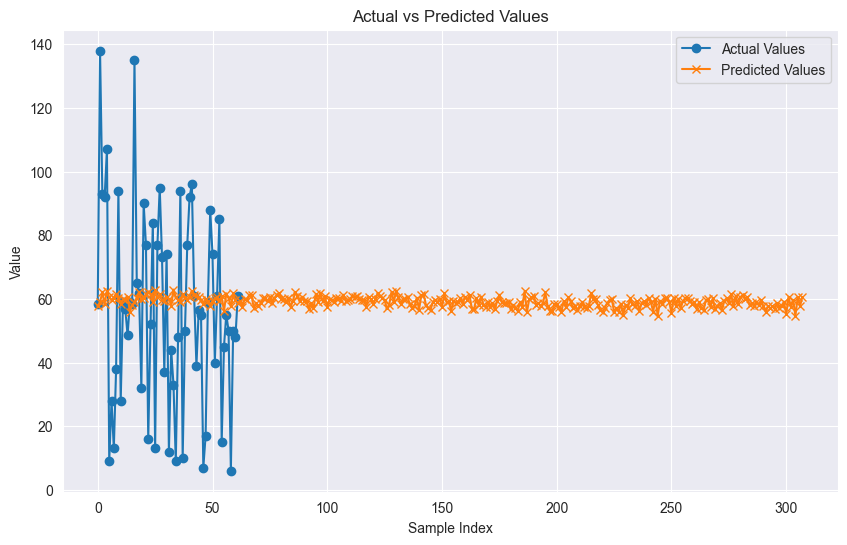

Classification Cross-Validation Scores: {'fit_time': array([0.01403069, 0.00804043, 0.01002669, 0.01001477, 0.00803304]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_accuracy': array([0.88709677, 0.80645161, 0.64516129, 0.85245902, 0.85245902]), 'train_accuracy': array([0.91056911, 0.91869919, 0.91869919, 0.90688259, 0.90283401])}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       255
         1.0       0.79      0.57      0.66        53

    accuracy                           0.90       308
   macro avg       0.85      0.77      0.80       308
weighted avg       0.89      0.90      0.89       308

Regression Cross-Validation Scores: {'fit_time': array([0.        , 0.        , 0.0020535 , 0.00802112, 0.        ]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([2171.52899516,  824.22352195,  325.64732797,  693.47798868,
        308.80667428]), 'train_score': array([448.4809601 , 780.04357

In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler

# 加载数据
file_path = '../data/raw/TrainDataset2024.xls'
data = pd.read_excel(file_path).drop(columns=['ID'])

# 处理缺失值
data = data.replace(999, np.nan)
data = data.dropna()

# 分离特征和目标变量
X = data.drop(columns=['pCR (outcome)', 'RelapseFreeSurvival (outcome)'])
y_classification = data['pCR (outcome)']
y_regression = data['RelapseFreeSurvival (outcome)']

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 逻辑回归分类
log_reg = LogisticRegression(max_iter=2000)
classification_scores = cross_validate(log_reg, X_scaled, y_classification, cv=5, scoring=['accuracy'], return_train_score=True)
log_reg.fit(X_scaled, y_classification)
y_pred_class = log_reg.predict(X_scaled)
classification_report_str = classification_report(y_classification, y_pred_class)

# SVM回归
svm_reg = SVR()
regression_scores = cross_validate(svm_reg, X_scaled, y_regression, cv=5, scoring=make_scorer(mean_squared_error), return_train_score=True)
svm_reg.fit(X_scaled, y_regression)
y_pred_reg = svm_reg.predict(X_scaled)
regression_mse = mean_squared_error(y_regression, y_pred_reg)

# 绘制对比图像
plt.figure(figsize=(10, 6))
plt.plot(y_test_reg.values, label='Actual Values', marker='o')
plt.plot(y_pred_reg, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 输出结果
print("Classification Cross-Validation Scores:", classification_scores)
print("Classification Report:\n", classification_report_str)
print("Regression Cross-Validation Scores:", regression_scores)
print(f"Regression Mean Squared Error: {regression_mse:.4f}")

Regression Mean Squared Error: 874.7942


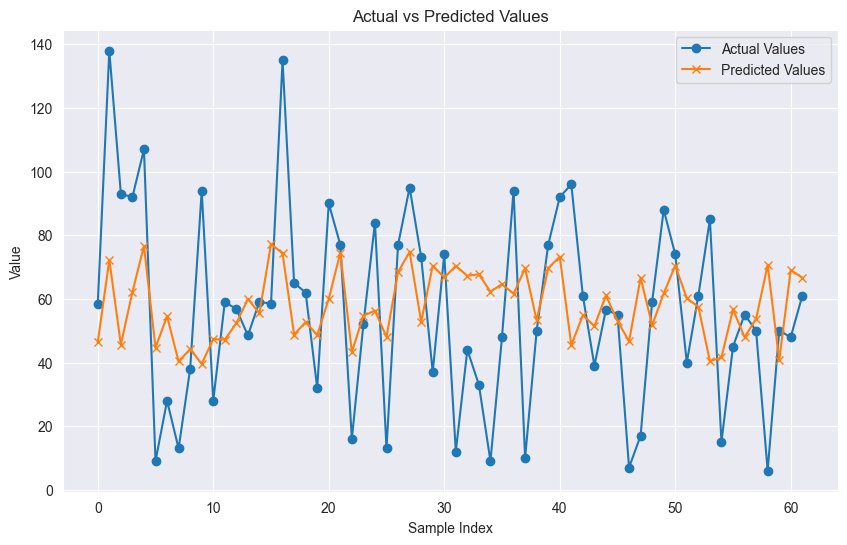

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 加载数据
file_path = '../data/raw/TrainDataset2024.xls'
data = pd.read_excel(file_path).drop(columns=['ID'])

# 处理缺失值
data = data.replace(999, np.nan)
data = data.dropna()

# 分离特征和目标变量
X = data.drop(columns=['pCR (outcome)', 'RelapseFreeSurvival (outcome)'])
y_regression = data['RelapseFreeSurvival (outcome)']

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)

# 随机森林回归
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
regression_mse = mean_squared_error(y_test, y_pred)
print(f"Regression Mean Squared Error: {regression_mse:.4f}")

# 绘制对比图像
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Regression Mean Squared Error: 930.7766


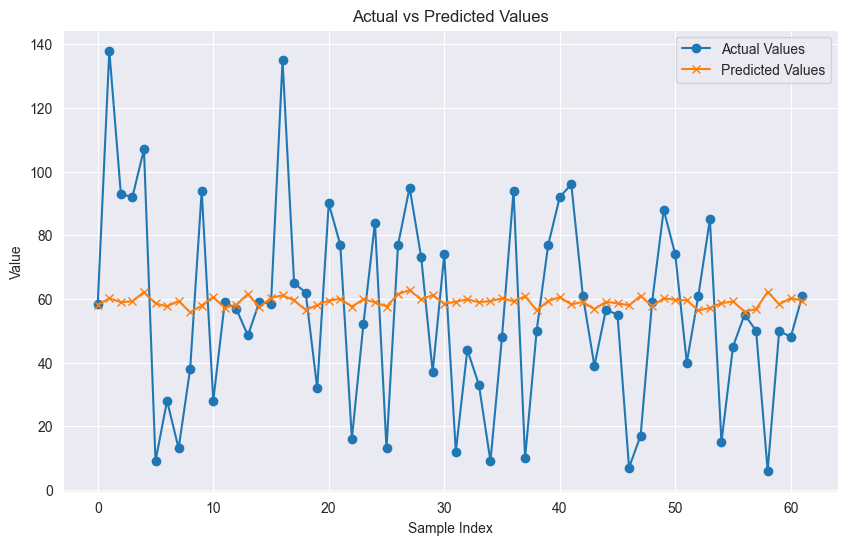

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 加载数据
file_path = '../data/raw/TrainDataset2024.xls'
data = pd.read_excel(file_path).drop(columns=['ID'])

# 处理缺失值
data = data.replace(999, np.nan)
data = data.dropna()

# 分离特征和目标变量
X = data.drop(columns=['pCR (outcome)', 'RelapseFreeSurvival (outcome)'])
y_classification = data['pCR (outcome)']
y_regression = data['RelapseFreeSurvival (outcome)']

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割数据集
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)

# SVM回归
svm_reg = SVR()
svm_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = svm_reg.predict(X_test_reg)
regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Mean Squared Error: {regression_mse:.4f}")

# 绘制对比图像
plt.figure(figsize=(10, 6))
plt.plot(y_test_reg.values, label='Actual Values', marker='o')
plt.plot(y_pred_reg, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# 加载数据
file_path = '../data/raw/TrainDataset2024.xls'
data = pd.read_excel(file_path).drop(columns=['ID'])

# 处理缺失值
data = data.replace(999, np.nan)
data = data.dropna()

# 分离特征和目标变量
X = data.drop(columns=['pCR (outcome)', 'RelapseFreeSurvival (outcome)'])
y_classification = data['pCR (outcome)']
y_regression = data['RelapseFreeSurvival (outcome)']

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割数据集
X_train, X_test, y_train_class, y_test_class = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)

def cross_validate_nn(X, y, param_grid, num_epochs=50, n_splits=5, task='classification'):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    best_score = 0
    best_params = {}

    for l2_lambda in param_grid['l2_lambda']:
        for lr in param_grid['lr']:
            fold_scores = []
            for train_index, val_index in kf.split(X):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                model = NeuralNet(input_size=X.shape[1], output_size=1, l2_lambda=l2_lambda)
                criterion = nn.BCEWithLogitsLoss() if task == 'classification' else nn.MSELoss()
                optimizer = optim.Adam(model.parameters(), lr=lr)

                train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=10, shuffle=True)

                for epoch in range(num_epochs):
                    for inputs, labels in train_loader:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels) + model.l2_regularization()
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                model.eval()
                with torch.no_grad():
                    y_val_pred = model(X_val)
                    if task == 'classification':
                        y_val_pred_class = (torch.sigmoid(y_val_pred) > 0.5).float()
                        fold_scores.append(accuracy_score(y_val, y_val_pred_class))
                    else:
                        fold_scores.append(mean_squared_error(y_val, y_val_pred))

            avg_score = np.mean(fold_scores)
            if avg_score > best_score:
                best_score = avg_score
                best_params = {'l2_lambda': l2_lambda, 'lr': lr}

    return best_params, best_score

# 定义网格搜索参数
param_grid = {
    'l2_lambda': [0.0, 0.01, 0.1],
    'lr': [0.001, 0.01, 0.1]
}

# 转换为PyTorch张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_class_tensor = torch.tensor(y_train_class.values, dtype=torch.float32).view(-1, 1)
y_train_reg_tensor = torch.tensor(y_train_reg.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_reg_tensor = torch.tensor(y_test_reg.values, dtype=torch.float32).view(-1, 1)

# 分类任务
best_params_class, best_score_class = cross_validate_nn(X_train_tensor, y_train_class_tensor, param_grid, task='classification')
print("Best Parameters for Classification:", best_params_class)
print("Best Cross-Validation Score for Classification:", best_score_class)

# 回归任务
best_params_reg, best_score_reg = cross_validate_nn(X_train_tensor, y_train_reg_tensor, param_grid, task='regression')
print("Best Parameters for Regression:", best_params_reg)
print("Best Cross-Validation Score for Regression:", best_score_reg)

# 使用最佳参数训练最终回归模型
model_reg = NeuralNet(input_size=X_train.shape[1], output_size=1, l2_lambda=best_params_reg['l2_lambda'])
criterion = nn.MSELoss()
optimizer = optim.Adam(model_reg.parameters(), lr=best_params_reg['lr'])

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_reg_tensor), batch_size=10, shuffle=True)
for epoch in range(50):
    for inputs, labels in train_loader:
        outputs = model_reg(inputs)
        loss = criterion(outputs, labels) + model_reg.l2_regularization()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# 评估最终回归模型
model_reg.eval()
with torch.no_grad():
    y_pred_reg = model_reg(X_test_tensor).numpy().flatten()
    regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
    print(f"Regression Mean Squared Error: {regression_mse:.4f}")

# 绘制回归对比图像
plt.figure(figsize=(10, 6))
plt.plot(y_test_reg.values, label='Actual Values', marker='o')
plt.plot(y_pred_reg, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

TypeError: __init__() got an unexpected keyword argument 'output_size'

C:\Users\Silas\AppData\Local\Temp\ipykernel_6132\4176459934.py:84: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode, inplace=True)
C:\Users\Silas\AppData\Local\Temp\ipykernel_6132\4176459934.py:84: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

pCR (outcome)                    0
RelapseFreeSurvival (outcome)    0
Age                              0
ER                               0
PgR                              0
                                ..
original_ngtdm_Busyness          0
original_ngtdm_Coarseness        0
original_ngtdm_Complexity        0
original_ngtdm_Contrast          0
original_ngtdm_Strength          0
Length: 120, dtype: int64
Best Parameters for Classification: {'l2_lambda': 0.0, 'lr': 0.001}
Best Cross-Validation Score for Classification: 0.496875
Best Parameters for Regression: {'l2_lambda': 0.0, 'lr': 0.01}
Best Cross-Validation Score for Regression: 1671.8171
Regression Mean Squared Error: 35027.0802


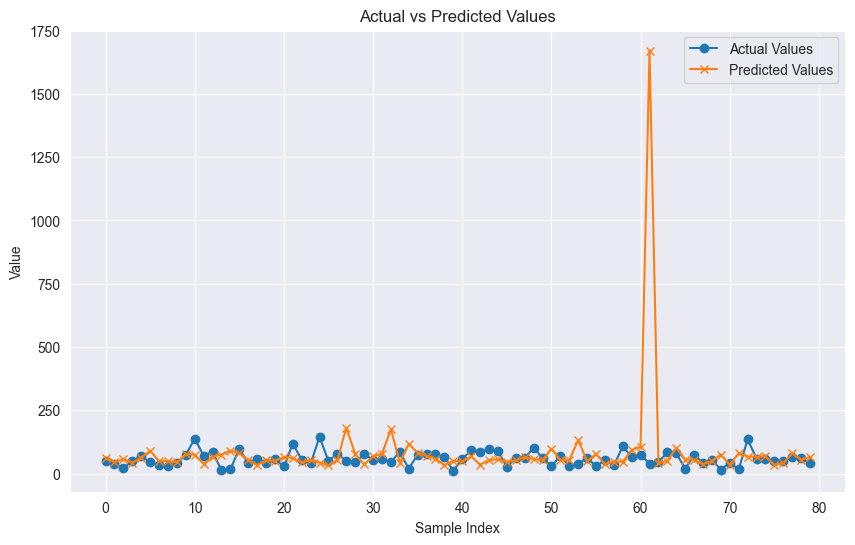

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class NeuralNet(nn.Module):
    def __init__(self, input_size, l2_lambda=0.0):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.l2_lambda = l2_lambda

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

    def l2_regularization(self):
        l2_reg = torch.tensor(0.)
        for param in self.parameters():
            l2_reg += torch.norm(param, 2)
        return self.l2_lambda * l2_reg

def cross_validate_nn(X, y, param_grid, num_epochs=50, n_splits=5, task='classification'):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    best_score = 0
    best_params = {}

    for l2_lambda in param_grid['l2_lambda']:
        for lr in param_grid['lr']:
            fold_scores = []
            for train_index, val_index in kf.split(X):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                model = NeuralNet(input_size=X.shape[1], l2_lambda=l2_lambda)
                criterion = nn.BCEWithLogitsLoss() if task == 'classification' else nn.MSELoss()
                optimizer = optim.Adam(model.parameters(), lr=lr)

                train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=10, shuffle=True)

                for epoch in range(num_epochs):
                    for inputs, labels in train_loader:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels) + model.l2_regularization()
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                model.eval()
                with torch.no_grad():
                    y_val_pred = model(X_val)
                    if task == 'classification':
                        y_val_pred_class = (torch.sigmoid(y_val_pred) > 0.5).float()
                        fold_scores.append(accuracy_score(y_val, y_val_pred_class))
                    else:
                        fold_scores.append(mean_squared_error(y_val, y_val_pred))

            avg_score = np.mean(fold_scores)
            if avg_score > best_score:
                best_score = avg_score
                best_params = {'l2_lambda': l2_lambda, 'lr': lr}

    return best_params, best_score

# 加载数据
file_path = '../data/raw/TrainDataset2024.xls'
data = pd.read_excel(file_path).drop(columns=['ID'])

# 用众数填充缺失值
for column in data.columns:
    mode = data[column].mode()[0]
    data[column].fillna(mode, inplace=True)

# 检查是否还有缺失值
missing_values = data.isnull().sum()
print(missing_values)

# 分离特征和目标变量
X = data.drop(columns=['pCR (outcome)', 'RelapseFreeSurvival (outcome)'])
y_classification = data['pCR (outcome)']
y_regression = data['RelapseFreeSurvival (outcome)']

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割数据集
X_train, X_test, y_train_class, y_test_class = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)

# 定义网格搜索参数
param_grid = {
    'l2_lambda': [0.0, 0.01, 0.1],
    'lr': [0.001, 0.01, 0.1]
}

# 转换为PyTorch张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_class_tensor = torch.tensor(y_train_class.values, dtype=torch.float32).view(-1, 1)
y_train_reg_tensor = torch.tensor(y_train_reg.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_reg_tensor = torch.tensor(y_test_reg.values, dtype=torch.float32).view(-1, 1)

# 分类任务
best_params_class, best_score_class = cross_validate_nn(X_train_tensor, y_train_class_tensor, param_grid, task='classification')
print("Best Parameters for Classification:", best_params_class)
print("Best Cross-Validation Score for Classification:", best_score_class)

# 回归任务
best_params_reg, best_score_reg = cross_validate_nn(X_train_tensor, y_train_reg_tensor, param_grid, task='regression')
print("Best Parameters for Regression:", best_params_reg)
print("Best Cross-Validation Score for Regression:", best_score_reg)

# 使用最佳参数训练最终回归模型
model_reg = NeuralNet(input_size=X_train.shape[1], l2_lambda=best_params_reg['l2_lambda'])
criterion = nn.MSELoss()
optimizer = optim.Adam(model_reg.parameters(), lr=best_params_reg['lr'])

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_reg_tensor), batch_size=10, shuffle=True)
for epoch in range(50):
    for inputs, labels in train_loader:
        outputs = model_reg(inputs)
        loss = criterion(outputs, labels) + model_reg.l2_regularization()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# 评估最终回归模型
model_reg.eval()
with torch.no_grad():
    y_pred_reg = model_reg(X_test_tensor).numpy().flatten()
    regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
    print(f"Regression Mean Squared Error: {regression_mse:.4f}")

# 绘制回归对比图像
plt.figure(figsize=(10, 6))
plt.plot(y_test_reg.values, label='Actual Values', marker='o')
plt.plot(y_pred_reg, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

def NSkNNData(dataMV, K):
    """
    使用NS - kNN方法填补数据集中的缺失值

    参数:
    dataMV (numpy.ndarray): 带有缺失值的数据集（可以是经过或未经过自动缩放的）
    K (int): 用于填补数据的最近邻数量

    返回:
    dataImputed (numpy.ndarray): 未加权填补后的数据集
    dataImputedWeighted (numpy.ndarray): 加权填补后的数据集
    """
    numCol = dataMV.shape[1]
    rowMV = []
    for col in range(numCol):
        rowMV.append(np.where(np.isnan(dataMV[:, col]))[0])

    distIdx = []
    counter = 0
    for targetCol in range(numCol):
        for neighborCol in range(numCol):
            MVRowsRemoved = dataMV.copy()
            rowsToRemove = np.union1d(rowMV[targetCol], rowMV[neighborCol])
            MVRowsRemoved = np.delete(MVRowsRemoved, rowsToRemove, axis=0)
            numMetInCalc = MVRowsRemoved.shape[0]
            distance = np.linalg.norm(MVRowsRemoved[:, targetCol].reshape(-1, 1) - MVRowsRemoved[:, neighborCol].reshape(-1, 1), axis=0) / np.sqrt(numMetInCalc)
            distIdx.append([targetCol, distance, neighborCol])
            counter += 1

    distIdx = np.array(distIdx)
    sameSample = np.where(distIdx[:, 0] == distIdx[:, 2])[0]
    distIdx = np.delete(distIdx, sameSample, axis=0)
    distIdxSorted = distIdx[np.argsort(distIdx[:, 1])]

    minValperRow = np.nanmin(dataMV, axis=1)

    dataImputed = dataMV.copy()
    dataImputedWeighted = dataMV.copy()
    for targetCol in range(numCol):
        numMV = len(rowMV[targetCol])
        firstNNIdx = (targetCol * (numCol - 1))
        for MVidx in range(numMV):
            tempDataMV = dataMV.copy()
            NN = distIdxSorted[firstNNIdx:firstNNIdx + K, 2].astype(int)
            DistanceNN = distIdxSorted[firstNNIdx:firstNNIdx + K, 1]
            idxNaNinCol = np.where(np.isnan(tempDataMV[rowMV[targetCol][MVidx], NN]))[0]
            if len(idxNaNinCol) > 0:
                tempDataMV[rowMV[targetCol][MVidx], NN[idxNaNinCol]] = minValperRow[rowMV[targetCol][MVidx]]
            WeightMultiplier = (1 / DistanceNN) / np.sum(1 / DistanceNN)
            dataImputedWeighted[rowMV[targetCol][MVidx], targetCol] = np.sum(tempDataMV[rowMV[targetCol][MVidx], NN] * WeightMultiplier)
            dataImputed[rowMV[targetCol][MVidx], targetCol] = np.mean(tempDataMV[rowMV[targetCol][MVidx], NN])

    return dataImputed, dataImputedWeighted

In [ ]:
import numpy as np

def NSkNNData(dataMV, K):
    """
    使用NS - kNN方法填补数据集中的缺失值

    参数:
    dataMV (numpy.ndarray): 带有缺失值的数据集（可以是经过或未经过自动缩放的）
    K (int): 用于填补数据的最近邻数量

    返回:
    dataImputed (numpy.ndarray): 未加权填补后的数据集
    dataImputedWeighted (numpy.ndarray): 加权填补后的数据集
    """
    numCol = dataMV.shape[1]
    rowMV = [np.where(np.isnan(dataMV[:, col]))[0] for col in range(numCol)]

    distIdx = []
    for targetCol in range(numCol):
        for neighborCol in range(numCol):
            if targetCol == neighborCol:
                continue
            MVRowsRemoved = dataMV[~np.isnan(dataMV[:, targetCol]) & ~np.isnan(dataMV[:, neighborCol])]
            numMetInCalc = MVRowsRemoved.shape[0]
            distance = np.linalg.norm(MVRowsRemoved[:, targetCol] - MVRowsRemoved[:, neighborCol]) / np.sqrt(numMetInCalc)
            distIdx.append([targetCol, distance, neighborCol])

    distIdx = np.array(distIdx)
    distIdxSorted = distIdx[np.argsort(distIdx[:, 1])]

    minValperRow = np.nanmin(dataMV, axis=1)

    dataImputed = dataMV.copy()
    dataImputedWeighted = dataMV.copy()
    for targetCol in range(numCol):
        numMV = len(rowMV[targetCol])
        firstNNIdx = targetCol * (numCol - 1)
        for MVidx in range(numMV):
            tempDataMV = dataMV.copy()
            NN = distIdxSorted[firstNNIdx:firstNNIdx + K, 2].astype(int)
            DistanceNN = distIdxSorted[firstNNIdx:firstNNIdx + K, 1]
            idxNaNinCol = np.isnan(tempDataMV[rowMV[targetCol][MVidx], NN])
            if np.any(idxNaNinCol):
                tempDataMV[rowMV[targetCol][MVidx], NN[idxNaNinCol]] = minValperRow[rowMV[targetCol][MVidx]]
            WeightMultiplier = (1 / DistanceNN) / np.sum(1 / DistanceNN)
            dataImputedWeighted[rowMV[targetCol][MVidx], targetCol] = np.sum(tempDataMV[rowMV[targetCol][MVidx], NN] * WeightMultiplier)
            dataImputed[rowMV[targetCol][MVidx], targetCol] = np.mean(tempDataMV[rowMV[targetCol][MVidx], NN])

    return dataImputed, dataImputedWeighted